In [2]:
from LDA import DA
import numpy as np
from ggplot import *
from pylab import *
from cross_validation import cv
%matplotlib inline

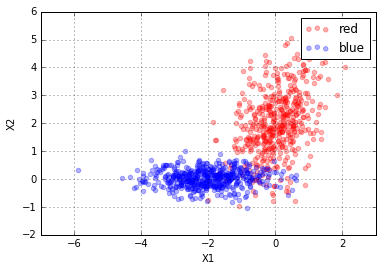

In [3]:
np.random.seed(1234)
cov1 = [[0.5, 1], [0, 1]]
cov2 = [[1, 0], [0, 0.1]]
mean1 = [0, 2]
mean2 = [-2, 0]
Y = np.random.randint(0, 2, 1000)
X1 = np.random.multivariate_normal(mean1, cov1, 475)
X2 = np.random.multivariate_normal(mean2, cov2, 525)
X = np.zeros((1000,2))
X[Y == 0] = X1
X[Y == 1] = X2

scatter(X1[:,0],X1[:,1],color='r', alpha = 0.3, label="red")
scatter(X2[:,0],X2[:,1],color='b', alpha = 0.3, label="blue")
xlabel("X1")
ylabel("X2")
grid()
legend()

In [4]:
fit = DA(X, Y, mode="QDA")
fit.sampleEstimate()
yhat, error = fit.predict(X,Y)
print("error: ", error)

error:  0.054


In [5]:
train_e, test_e = cv(DA, "QDA", 10, X, Y)

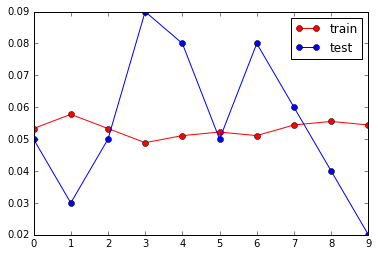

In [6]:
plot(range(len(train_e)), train_e, color='r', label="train", marker='o')
plot(range(len(test_e)), test_e, color='b', label="test", marker='o')
legend()

In [7]:
mean(train_e), mean(test_e)

(0.053222222222222212, 0.055000000000000014)

In [8]:
from scipy.linalg import svd, eig
from sklearn.decomposition import PCA
X -= X.mean(axis=0)
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
u,d,v = svd(X, full_matrices=False)
eig(np.dot(X.T,X))

[ 0.84025366  0.15974634]


(array([ 2859.11432659+0.j,   543.56568263+0.j]),
 array([[ 0.70856441, -0.70564615],
        [ 0.70564615,  0.70856441]]))

In [12]:
from PCA import PCA as MPCA

mpca = MPCA(X) 
mpca.summary()
a = mpca.fit()


In [16]:
sort(a)

ValueError: setting an array element with a sequence.

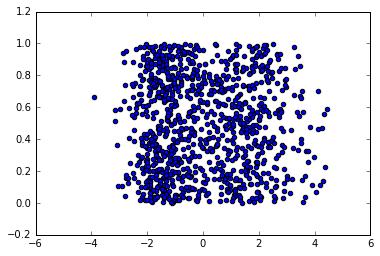

In [13]:
x1 = mpca.transform(1)
scatter(x1, np.random.rand(len(x1)))

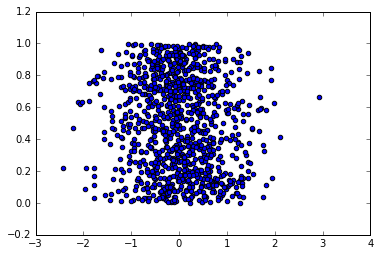

In [10]:
x2 = mpca.transform(2)
scatter(x2[:,1], np.random.rand(len(x2[:,1])))